# Sensitivity Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abalone = pd.read_csv(url
                      , sep=','
                      , header=None
                      , names=['sex', 'length', 'diameter', 'height', 
                               'whole_weight', 'shucked_weight', 'viscera_weight',
                               'shell_weight', 'rings']
                     , index_col=None)

In [3]:
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Linear Regression

In [4]:
abalone['sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [5]:
abalone['sex_m'] = np.where(abalone['sex'] == 'M', 1, 0)
abalone['sex_f'] = np.where(abalone['sex'] == 'F', 1, 0)

In [6]:
# get X variables
import statsmodels.api as sm
X = abalone[["sex_m", "sex_f", "length", "diameter", "height", "shell_weight", "rings"]]
X = sm.add_constant(X) # add a constant to model
X_col = X.columns
print(X_col)
print(X)

# get y value
y = abalone["whole_weight"]

Index(['const', 'sex_m', 'sex_f', 'length', 'diameter', 'height',
       'shell_weight', 'rings'],
      dtype='object')
      const  sex_m  sex_f  length  diameter  height  shell_weight  rings
0       1.0      1      0   0.455     0.365   0.095        0.1500     15
1       1.0      1      0   0.350     0.265   0.090        0.0700      7
2       1.0      0      1   0.530     0.420   0.135        0.2100      9
3       1.0      1      0   0.440     0.365   0.125        0.1550     10
4       1.0      0      0   0.330     0.255   0.080        0.0550      7
...     ...    ...    ...     ...       ...     ...           ...    ...
4172    1.0      0      1   0.565     0.450   0.165        0.2490     11
4173    1.0      1      0   0.590     0.440   0.135        0.2605     10
4174    1.0      1      0   0.600     0.475   0.205        0.3080      9
4175    1.0      0      1   0.625     0.485   0.150        0.2960     10
4176    1.0      1      0   0.710     0.555   0.195        0.4950     12

[4

/Users/ihongdon/anaconda3/envs/py3.6_tf2.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
# train, test set split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=2004)

In [8]:
print('Shape of X_train:', X_train.shape) 
print('Shape of X_test:', X_test.shape) 
print('Shape of y_train:', y_train.shape) 
print('Shape of y_test:', y_test.shape)

Shape of X_train: (3341, 8)
Shape of X_test: (836, 8)
Shape of y_train: (3341,)
Shape of y_test: (836,)


### Multivariate Linear Regression Model

In [9]:
# multivariate linear regression model
import statsmodels.api as sm

lin_reg = sm.OLS(y_train, X_train).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           whole_weight   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     7738.
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:43:07   Log-Likelihood:                 2375.3
No. Observations:                3341   AIC:                            -4735.
Df Residuals:                    3333   BIC:                            -4686.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3609      0.015    -23.795      0.000      -0.391      -0.331
sex_m            0.0349      0.006      6.039      0.000       0.024       0.046
sex_f            0.0217      0.006      3.493      0.000       0.010       0.034
length           1.2539      0.107     11.724      0.000       1.044       1.464
diameter         0.0749      0.135      0.554      0.580      -0.190       0.340
height           0.3880      0.088      4.410      0.000       0.216       0.561
shell_weight     2.4384      0.038     64.802      0.000       2.365       2.512
rings           -0.0154      0.001    -18.423      0.000      -0.017      -0.014
==============================================================================
Omnibus:                      698.165   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4041.763
Skew:                           0.866   Prob(JB):                         0.00
Kurtosis:                       8.102   Cond. No.                         866.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# prediction
predicted = lin_reg.predict(X_test)
actual = y_test

act_pred_df = pd.DataFrame({'actual': actual
                            , 'predicted': predicted
                            , 'error': actual - predicted})

act_pred_df.head()

,actual,predicted,error
3473,0.0455,-0.094703,0.140203
3523,0.0970,0.020604,0.076396
1862,0.5185,0.690349,-0.171849
2966,1.4820,1.358950,0.123050
659,0.9585,1.137433,-0.178933


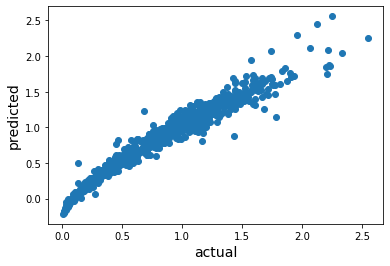

In [11]:
import matplotlib.pyplot as plt

plt.plot(act_pred_df['actual'], act_pred_df['predicted'], 'o')
plt.xlabel('actual', fontsize=14)
plt.ylabel('predicted', fontsize=14)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(actual, predicted))
rmse

0.11099248621173345

### Sensitivity Analysis

In [13]:
X_test.shape

(836, 8)

In [14]:
# get 1st observation's value as an example
X_i = X_test.iloc[0, :]
X_i

const           1.000
sex_m           0.000
sex_f           0.000
length          0.210
diameter        0.150
height          0.055
shell_weight    0.013
rings           4.000
Name: 3473, dtype: float64

In [15]:
X_i.shape[0]

8

In [16]:
# all zeros matrix with shape of [col_num, col_num]
X_mat = np.zeros(shape=[X_i.shape[0], X_i.shape[0]])
X_mat

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
# fill only 1 variable's value and leave '0' for the others
for i, j in enumerate(X_i):
    X_mat[i, i] = j

In [18]:
X_mat

array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.21 , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.15 , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.055, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.013, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 4.   ]])

In [19]:
sensitivity_df = pd.DataFrame({'x': X_test.iloc[0, :]
                               , 'contribution_x': lin_reg.predict(X_mat)}).\
                 sort_values(by='contribution_x', ascending=False)

sensitivity_df

,x,contribution_x
length,0.210,0.263315
shell_weight,0.013,0.031699
height,0.055,0.021341
diameter,0.150,0.011237
sex_m,0.000,0.000000
sex_f,0.000,0.000000
rings,4.000,-0.061437
const,1.000,-0.360857


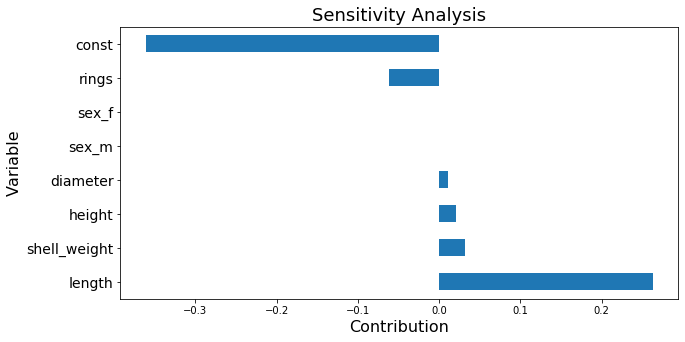

In [20]:
sensitivity_df['contribution_x'].plot(kind='barh', figsize=(10, 5))
plt.title('Sensitivity Analysis', fontsize=18)
plt.xlabel('Contribution', fontsize=16)
plt.ylabel('Variable', fontsize=16)
plt.yticks(fontsize=14)
plt.show()

In [21]:
sum(sensitivity_df['contribution_x'])

-0.09470251191012563

In [22]:
lin_reg.predict(X_test.iloc[0, :].to_numpy())

array([-0.09470251])

In [23]:
# UDF for contribution(sensitivity) analysis per each variables
def sensitivity_analysis(model, X, idx, bar_plot_yn):
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    
    # get one object's X values
    X_i = X.iloc[idx, :]
    
    # make a matrix with zeros with shape of [num_cols, num_cols]
    X_mat = np.zeros(shape=[X_i.shape[0], X_i.shape[0]])
    
    # fil X_mat with values from one by one columns, leaving the ohters zeros
    for i, j in enumerate(X_i):
        X_mat[i, i] = j
    
    # data frame with contribution of each X columns in descending order
    sensitivity_df = pd.DataFrame({'idx': idx
                                   , 'x': X_i
                                   , 'contribution_x': model.predict(X_mat)}).\
                    sort_values(by='contribution_x', ascending=True)
    
    # if bar_plot_yn == True then display it
    col_n = X_i.shape[0]
    if bar_plot_yn == True:
        sensitivity_df['contribution_x'].plot(kind='barh', figsize=(10, 0.7*col_n))
        plt.title('Sensitivity Analysis', fontsize=18)
        plt.xlabel('Contribution', fontsize=16)
        plt.ylabel('Variable', fontsize=16)
        plt.yticks(fontsize=14)
        plt.show()
    
    return sensitivity_df.sort_values(by='contribution_x', ascending=False)

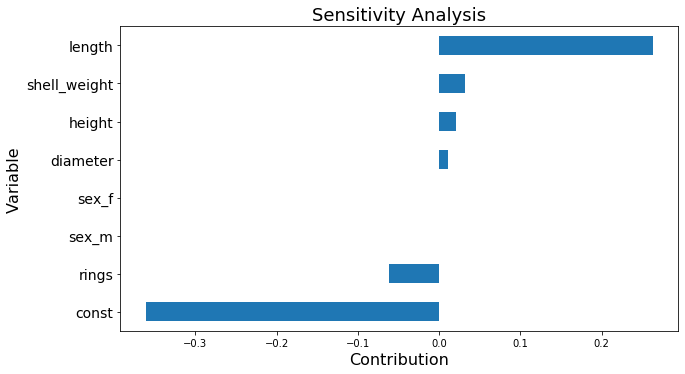

,idx,x,contribution_x
length,0,0.210,0.263315
shell_weight,0,0.013,0.031699
height,0,0.055,0.021341
diameter,0,0.150,0.011237
sex_m,0,0.000,0.000000
sex_f,0,0.000,0.000000
rings,0,4.000,-0.061437
const,0,1.000,-0.360857


In [24]:
sensitivity_df = sensitivity_analysis(model=lin_reg, X=X_test, idx=0, bar_plot_yn=True)
sensitivity_df

In [25]:
sensitivity_df = sensitivity_analysis(model=lin_reg, X=X_test, idx=0, bar_plot_yn=False)
sensitivity_df

,idx,x,contribution_x
length,0,0.210,0.263315
shell_weight,0,0.013,0.031699
height,0,0.055,0.021341
diameter,0,0.150,0.011237
sex_m,0,0.000,0.000000
sex_f,0,0.000,0.000000
rings,0,4.000,-0.061437
const,0,1.000,-0.360857


In [26]:
# calculate sensitivity of each columns of the first 10 objects using for loop

# blank DataFrame to save the sensitivity results together
sensitivity_df_all = pd.DataFrame()
to_idx = 10

for idx in range(0, to_idx):
    sensitivity_df_idx = sensitivity_analysis(model=lin_reg
                                              , X=X_test
                                              , idx=idx
                                              , bar_plot_yn=False)
    
    sensitivity_df_all = pd.concat([sensitivity_df_all, sensitivity_df_idx], axis=0)
    
    print("[STATUS]", idx+1, "/", to_idx, "(", 100*(idx+1)/to_idx, "%) is completed...")

[STATUS] 1 / 10 ( 10.0 %) is completed...
[STATUS] 2 / 10 ( 20.0 %) is completed...
[STATUS] 3 / 10 ( 30.0 %) is completed...
[STATUS] 4 / 10 ( 40.0 %) is completed...
[STATUS] 5 / 10 ( 50.0 %) is completed...
[STATUS] 6 / 10 ( 60.0 %) is completed...
[STATUS] 7 / 10 ( 70.0 %) is completed...
[STATUS] 8 / 10 ( 80.0 %) is completed...
[STATUS] 9 / 10 ( 90.0 %) is completed...
[STATUS] 10 / 10 ( 100.0 %) is completed...


In [27]:
sensitivity_df_all[:20]

,idx,x,contribution_x
length,0,0.2100,0.263315
shell_weight,0,0.0130,0.031699
height,0,0.0550,0.021341
diameter,0,0.1500,0.011237
sex_m,0,0.0000,0.000000
sex_f,0,0.0000,0.000000
rings,0,4.0000,-0.061437
const,0,1.0000,-0.360857
length,1,0.2600,0.326009
shell_weight,1,0.0305,0.074372


### (2) Logistic Regression for Classification

In [28]:
# make a y_category variable: if y is greater or equal to mean, then 1
y_cat = np.where(abalone["whole_weight"] >= np.mean(abalone["whole_weight"]), 1, 0)
y_cat[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
cat_class, counts = np.unique(y_cat, return_counts=True)
dict(zip(cat_class, counts))

{0: 2178, 1: 1999}

In [30]:
# train, test set split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_cat, 
                                                    test_size=0.2, 
                                                    random_state=2004)

In [31]:
# fitting logistic regression
import statsmodels.api as sm
pd.options.mode.chained_assignment = None

logitreg = sm.Logit(y_train, X_train)
logitreg_fit = logitreg.fit()

print(logitreg_fit.summary())

Optimization terminated successfully.
         Current function value: 0.108606
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3341
Model:                          Logit   Df Residuals:                     3333
Method:                           MLE   Df Model:                            7
Date:                Fri, 17 Jan 2020   Pseudo R-squ.:                  0.8431
Time:                        21:43:08   Log-Likelihood:                -362.85
converged:                       True   LL-Null:                       -2313.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -35.3546      2.219    -15.935      0.000     -39.703     -31.006
sex_m            1.306

In [32]:
# prediction
test_prob_logitreg = logitreg_fit.predict(X_test)
test_prob_logitreg.head()

3473    9.341757e-12
3523    2.440305e-10
1862    1.147617e-02
2966    9.999843e-01
659     9.964952e-01
dtype: float64

In [33]:
# UDF for contribution(sensitivity) analysis per each variables
def sensitivity_analysis_LinearReg_LogitReg(task, model, X, idx, bar_plot_yn):
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    pd.options.mode.chained_assignment = None
    
    # get one object's X values
    X_i = X.iloc[idx, :]
    
    # make a matrix with zeros with shape of [num_cols, num_cols]
    X_mat = np.zeros(shape=[X_i.shape[0], X_i.shape[0]])
    
    # fil X_mat with values from one by one columns, leaving the ohters zeros
    for i, j in enumerate(X_i):
        X_mat[i, i] = j
        
    # data frame with contribution of each X columns in descending order
    sensitivity_df = pd.DataFrame({
        'idx': idx
        , 'task': task
        , 'x': X_i
        , 'contribution_x': model.predict(X_mat)     
    })
    
#     # ==== Remark =====
#     # if you used LogisticRegressionsklearn library from sklearn.linear_model
#     # then use codes below
#     if task == "LinearReg":
#         sensitivity_df = pd.DataFrame({
#             'idx': idx
#             , 'task': task
#             , 'x': X_i
#             , 'contribution_x': model.predict(X_mat) 
#         })
        
#     elif task == "LogitReg":
#         sensitivity_df = pd.DataFrame({
#             'idx': idx
#             , 'task': task
#             , 'x': X_i
#             , 'contribution_x': model.predict_proba(X_mat)[:,1] 
#         })
#     else:
#         print('Please choose task one of "LinearReg" or "LogitReg"...')
    
    
    sensitivity_df = sensitivity_df.sort_values(by='contribution_x', ascending=True)
    
    # if bar_plot_yn == True then display it
    col_n = X_i.shape[0]
    if bar_plot_yn == True:
        sensitivity_df['contribution_x'].plot(kind='barh', figsize=(10, 0.7*col_n))
        plt.title('Sensitivity Analysis', fontsize=18)
        plt.xlabel('Contribution', fontsize=16)
        plt.ylabel('Variable', fontsize=16)
        plt.yticks(fontsize=14)
        plt.show()
    
    return sensitivity_df.sort_values(by='contribution_x', ascending=False)

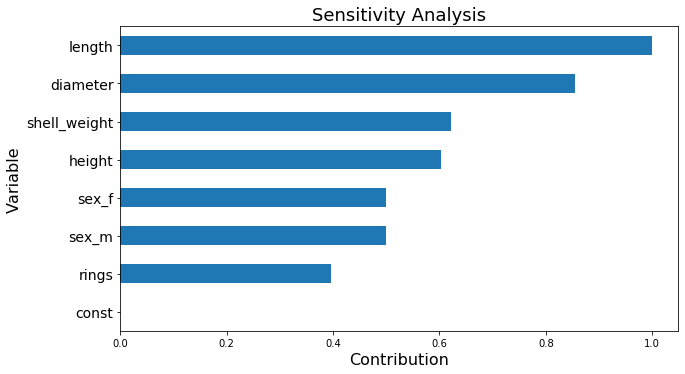

,idx,task,x,contribution_x
length,0,LogitReg,0.210,9.995470e-01
diameter,0,LogitReg,0.150,8.543829e-01
shell_weight,0,LogitReg,0.013,6.213326e-01
height,0,LogitReg,0.055,6.032407e-01
sex_m,0,LogitReg,0.000,5.000000e-01
sex_f,0,LogitReg,0.000,5.000000e-01
rings,0,LogitReg,4.000,3.954123e-01
const,0,LogitReg,1.000,4.422659e-16


In [34]:
# apply sensitivity analysis function on 1st observation for Logistic Regression
sensitivity_analysis_LinearReg_LogitReg(task="LogitReg"
                                        , model=logitreg_fit
                                        , X=X_test
                                        , idx=0
                                        , bar_plot_yn=True)

Thanks!